In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta

In [15]:
df = pd.read_csv('data/csv_202203_202309/202203-divvy-tripdata.csv')
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,47EC0A7F82E65D52,classic_bike,2022-03-21 13:45:01,2022-03-21 13:51:18,Wabash Ave & Wacker Pl,TA1307000131,Kingsbury St & Kinzie St,KA1503000043,41.886875,-87.626030,41.889177,-87.638506,member
1,8494861979B0F477,electric_bike,2022-03-16 09:37:16,2022-03-16 09:43:34,Michigan Ave & Oak St,13042,Orleans St & Chestnut St (NEXT Apts),620,41.900998,-87.623752,41.898203,-87.637536,member
2,EFE527AF80B66109,classic_bike,2022-03-23 19:52:02,2022-03-23 19:54:48,Broadway & Berwyn Ave,13109,Broadway & Ridge Ave,15578,41.978353,-87.659753,41.984045,-87.660274,member
3,9F446FD9DEE3F389,classic_bike,2022-03-01 19:12:26,2022-03-01 19:22:14,Wabash Ave & Wacker Pl,TA1307000131,Franklin St & Jackson Blvd,TA1305000025,41.886875,-87.626030,41.877708,-87.635321,member
4,431128AD9AFFEDC0,classic_bike,2022-03-21 18:37:01,2022-03-21 19:19:11,DuSable Lake Shore Dr & North Blvd,LF-005,Loomis St & Jackson Blvd,13206,41.911722,-87.626804,41.877945,-87.662007,member


In [5]:
# start_station_idとend_station_idでエッジリストを作成
df_edge = df[['start_station_id', 'end_station_id']]
df_edge = df_edge.groupby(['start_station_id', 'end_station_id']).size().reset_index()
df_edge.columns = ['start_station_id', 'end_station_id', 'count']
df_edge.head()

,start_station_id,end_station_id,count
0,13001,13001,84
1,13001,13006,6
2,13001,13008,31
3,13001,13011,26
4,13001,13016,13


In [26]:
# dfを1日単位で分割する
# NMPlot
# 欠損値があったら削除する
df = df.dropna()
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])

current_timestamp = df['started_at'].min()
end_timestamp = df["started_at"].max()
interval = timedelta(days=1)

node_list = []
edge_list = []

while current_timestamp <= end_timestamp:
    next_timestamp = current_timestamp + interval
    df_tmp = df[(df['started_at'] >= current_timestamp) & (df['started_at'] < next_timestamp)]
    df_tmp = df_tmp[['start_station_name', 'end_station_name']]


    unique_list = []
    for i in range(len(df_tmp)):
        unique_list.append(df_tmp.iloc[i, 0])
        unique_list.append(df_tmp.iloc[i, 1])
    # リストの重複を削除
    unique_list = list(set(unique_list))
    
    # df_tmpの重複を削除
    df_tmp = df_tmp.drop_duplicates()

    node_list.append(len(unique_list))
    edge_list.append(len(df_tmp))
    
    current_timestamp = next_timestamp


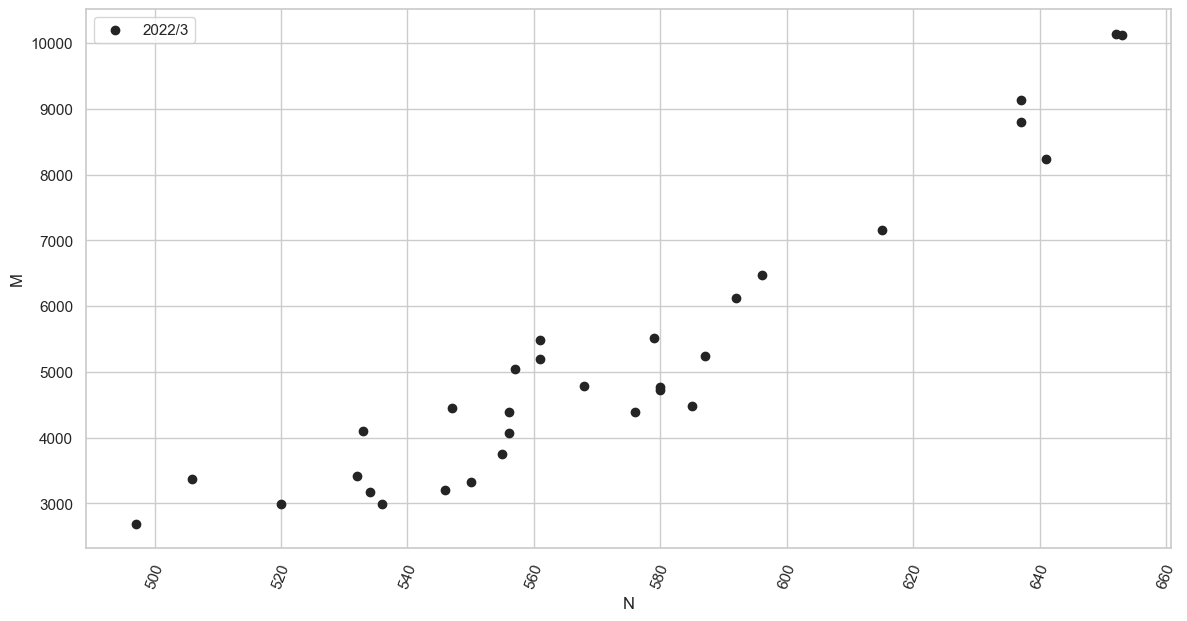

In [27]:
plt.figure(figsize=(14,7))
plt.scatter(node_list, edge_list, label="2022/3")
plt.xticks(rotation=70)
plt.xlabel("N")
plt.ylabel("M")
plt.legend()
plt.show()

In [37]:
def return_nm(df):
    df = df.dropna()
    df['started_at'] = pd.to_datetime(df['started_at'])
    df['ended_at'] = pd.to_datetime(df['ended_at'])

    current_timestamp = df['started_at'].min()
    end_timestamp = df["started_at"].max()
    interval = timedelta(days=1)

    node_list = []
    edge_list = []
    timestamp = []

    while current_timestamp <= end_timestamp:
        timestamp.append(current_timestamp)
        next_timestamp = current_timestamp + interval
        df_tmp = df[(df['started_at'] >= current_timestamp) & (df['started_at'] < next_timestamp)]
        df_tmp = df_tmp[['start_station_name', 'end_station_name']]


        unique_list = []
        for i in range(len(df_tmp)):
            unique_list.append(df_tmp.iloc[i, 0])
            unique_list.append(df_tmp.iloc[i, 1])
        # リストの重複を削除
        unique_list = list(set(unique_list))
        
        # df_tmpの重複を削除
        df_tmp = df_tmp.drop_duplicates()

        node_list.append(len(unique_list))
        edge_list.append(len(df_tmp))
        
        current_timestamp = next_timestamp

    return node_list, edge_list, timestamp

/var/folders/n0/r52jwj117lx5t69xm0bw9b980000gn/T/ipykernel_89129/913305383.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['started_at'] = pd.to_datetime(df['started_at'])
/var/folders/n0/r52jwj117lx5t69xm0bw9b980000gn/T/ipykernel_89129/913305383.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ended_at'] = pd.to_datetime(df['ended_at'])


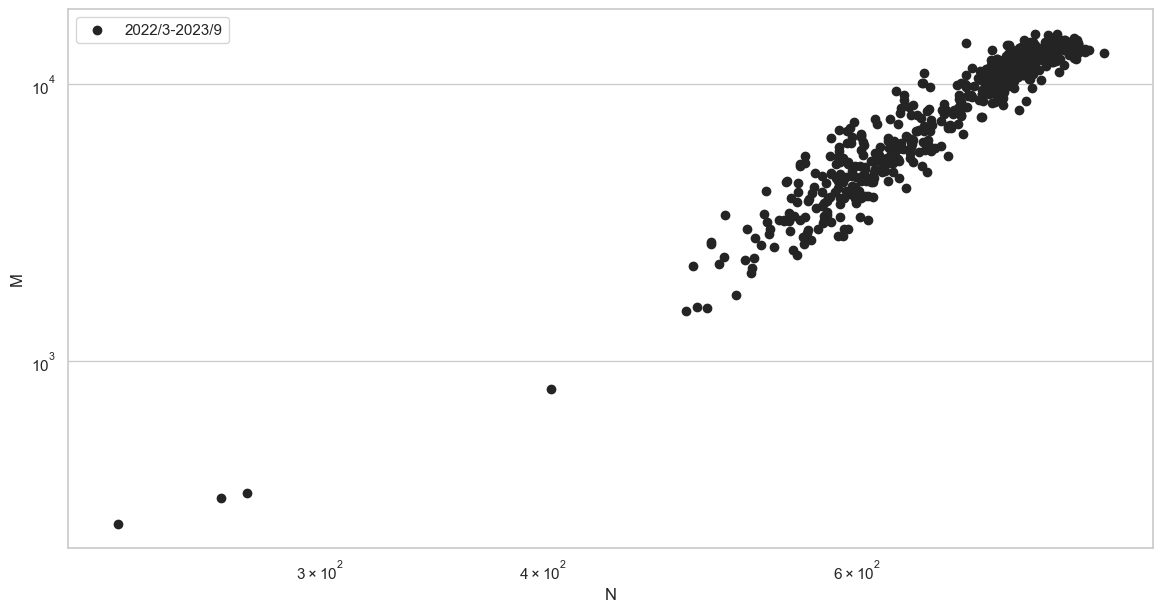

In [36]:
df = pd.read_csv('data/csv_202203_202309/202203_202309-divvy-tripdata.csv')
node_list, edge_list = return_nm(df)
plt.figure(figsize=(14,7))
plt.scatter(node_list, edge_list, label="2022/3-2023/9")
plt.xticks(rotation=70)
plt.xlabel("N")
plt.ylabel("M")
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()

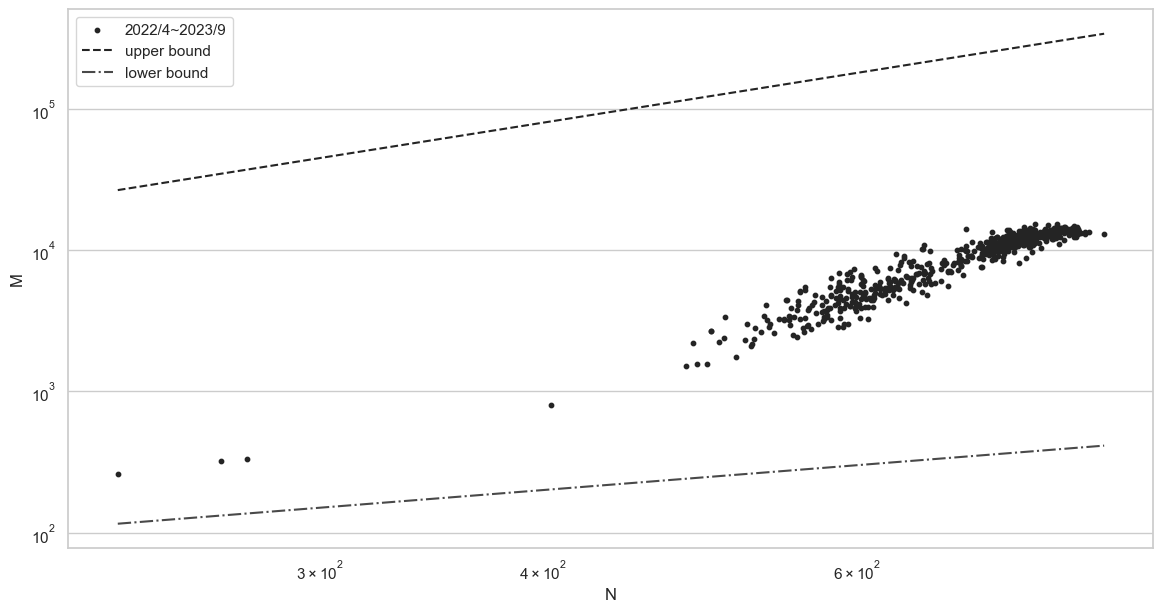

In [57]:
nn = len(node_list)
xmin = min(node_list)
xmax = max(node_list)
p = np.linspace(xmin, xmax, nn)
upper_bound = (p**2-p)/2
lower_bound = p/2

plt.figure(figsize=(14,7))
plt.scatter(node_list, edge_list, label="2022/4~2023/9", marker="o", s=10)
plt.plot(p, upper_bound, '--', label="upper bound")
plt.plot(p, lower_bound, '-.', label="lower bound")
plt.xticks(rotation=70)
plt.xlabel("N")
plt.ylabel("M")
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()

/var/folders/n0/r52jwj117lx5t69xm0bw9b980000gn/T/ipykernel_89129/3373734728.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['started_at'] = pd.to_datetime(df['started_at'])
/var/folders/n0/r52jwj117lx5t69xm0bw9b980000gn/T/ipykernel_89129/3373734728.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ended_at'] = pd.to_datetime(df['ended_at'])
/var/folders/n0/r52jwj117lx5t69xm0bw9b980000gn/T/ipykernel_89129/3373734728.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

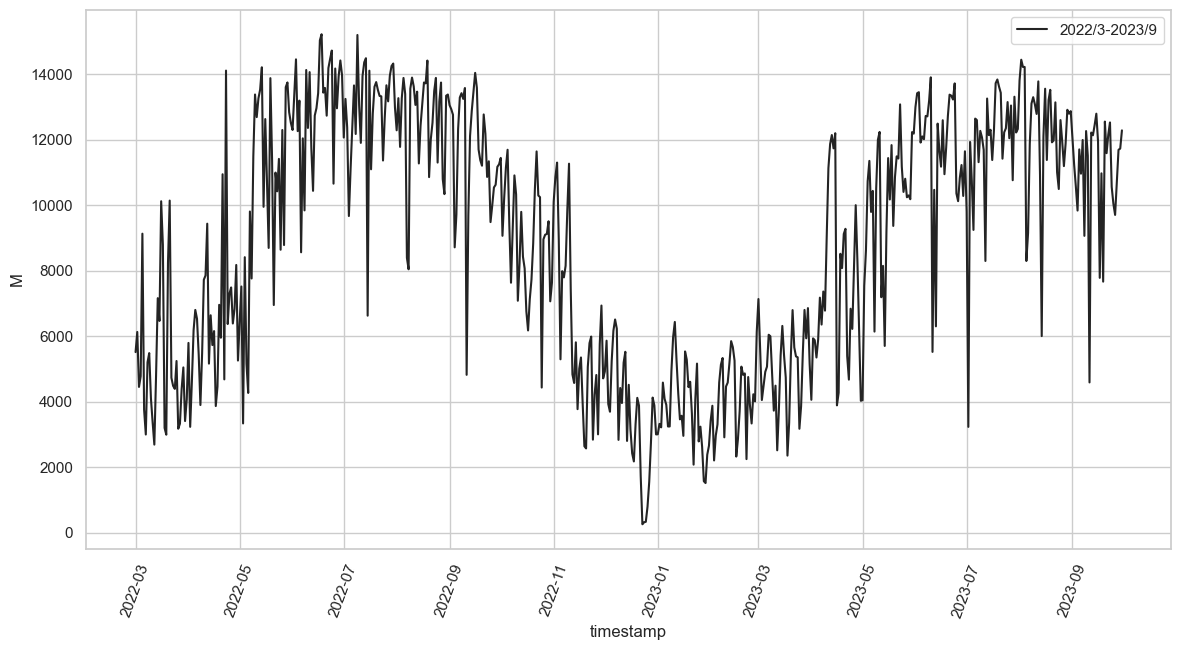

In [38]:
# x軸にタイムスタンプ、y軸にMをとる
# 2022/3-2023/9
m = return_nm(df)[1]
timestamp = return_nm(df)[2]
plt.figure(figsize=(14,7))
plt.plot(timestamp, m, label="2022/3-2023/9")
plt.xticks(rotation=70)
plt.xlabel("timestamp")
plt.ylabel("M")
plt.legend()
plt.show()

In [33]:
# lockdown
lockdown1 = pd.read_csv("./data/lockdown1.csv")
lockdown2 = pd.read_csv("./data/lockdown2.csv")
normal = pd.read_csv("./data/normal07_10.csv")

/var/folders/n0/r52jwj117lx5t69xm0bw9b980000gn/T/ipykernel_89129/2312288420.py:3: DtypeWarning: Columns (2,10) have mixed types. Specify dtype option on import or set low_memory=False.
  lockdown2 = pd.read_csv("./data/lockdown2.csv")
/var/folders/n0/r52jwj117lx5t69xm0bw9b980000gn/T/ipykernel_89129/2312288420.py:4: DtypeWarning: Columns (2,10) have mixed types. Specify dtype option on import or set low_memory=False.
  normal = pd.read_csv("./data/normal07_10.csv")


/var/folders/n0/r52jwj117lx5t69xm0bw9b980000gn/T/ipykernel_89129/3373734728.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['started_at'] = pd.to_datetime(df['started_at'])
/var/folders/n0/r52jwj117lx5t69xm0bw9b980000gn/T/ipykernel_89129/3373734728.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ended_at'] = pd.to_datetime(df['ended_at'])
/var/folders/n0/r52jwj117lx5t69xm0bw9b980000gn/T/ipykernel_89129/3373734728.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

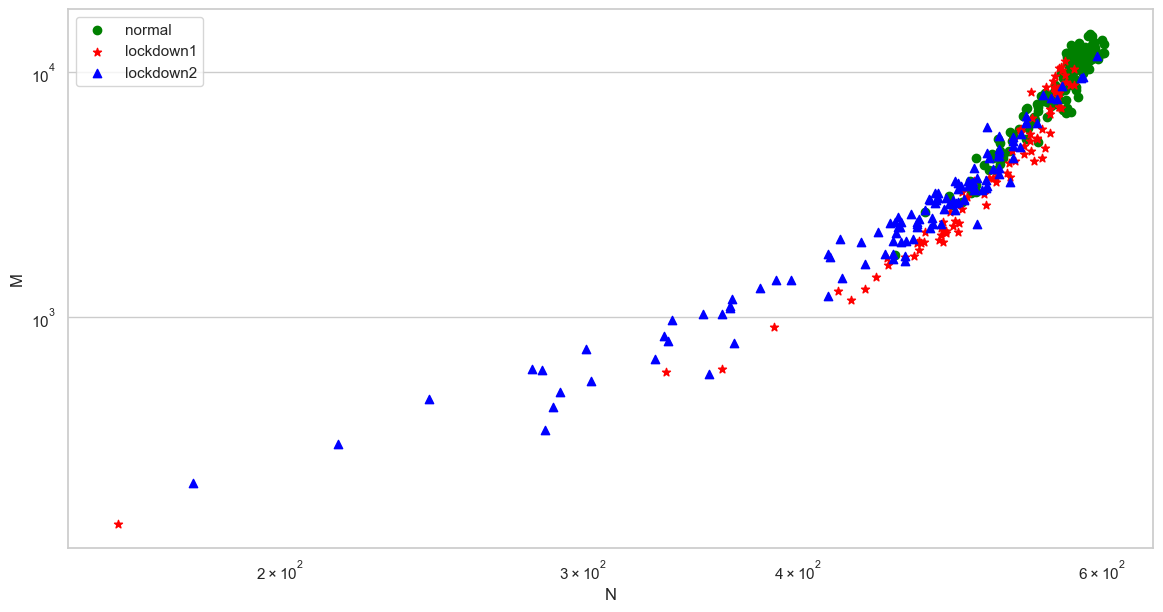

In [45]:
l1 = return_nm(lockdown1)
l2 = return_nm(lockdown2)
n = return_nm(normal)

plt.figure(figsize=(14,7))

plt.scatter(n[0], n[1], label="normal", marker="o", c="green")
plt.scatter(l1[0], l1[1], label="lockdown1", marker="*", c="red")
plt.scatter(l2[0], l2[1], label="lockdown2", marker="^", c="blue")

plt.xticks(rotation=70)
plt.xscale('log')
plt.yscale('log')
plt.xlabel("N")
plt.ylabel("M")
plt.legend()
plt.show()


In [46]:
all_df = pd.read_csv("./data/all.csv")
all_df = all_df.dropna()
all_df.head()

/var/folders/n0/r52jwj117lx5t69xm0bw9b980000gn/T/ipykernel_89129/3278238144.py:1: DtypeWarning: Columns (2,10) have mixed types. Specify dtype option on import or set low_memory=False.
  all_df = pd.read_csv("./data/all.csv")


,end_lat,end_lng,end_station_id,end_station_name,ended_at,member_casual,ride_id,rideable_type,start_lat,start_lng,start_station_id,start_station_name,started_at,distance
0,41.9322,-87.6586,152.0,Lincoln Ave & Diversey Pkwy,2020-04-26 18:12:03,member,A847FADBBC638E45,docked_bike,41.8964,-87.6610,86,Eckhart Park,2020-04-26 17:45:14,3.981346
1,41.9306,-87.7238,499.0,Kosciuszko Park,2020-04-17 17:17:03,member,5405B80E996FF60D,docked_bike,41.9244,-87.7154,503,Drake Ave & Fullerton Ave,2020-04-17 17:08:54,0.979629
2,41.8679,-87.6230,255.0,Indiana Ave & Roosevelt Rd,2020-04-01 18:08:36,member,5DD24A79A4E006F4,docked_bike,41.8945,-87.6179,142,McClurg Ct & Erie St,2020-04-01 17:54:13,2.984661
3,41.8992,-87.6722,657.0,Wood St & Augusta Blvd,2020-04-07 13:02:31,member,2A59BBDF5CDBA725,docked_bike,41.9030,-87.6975,216,California Ave & Division St,2020-04-07 12:50:19,2.141375
4,41.9695,-87.6547,323.0,Sheridan Rd & Lawrence Ave,2020-04-18 11:15:54,casual,27AD306C119C6158,docked_bike,41.8902,-87.6262,125,Rush St & Hubbard St,2020-04-18 10:22:59,9.119685


In [48]:
all_nm = return_nm(all_df)

/var/folders/n0/r52jwj117lx5t69xm0bw9b980000gn/T/ipykernel_89129/4177704033.py:18: RuntimeWarning: invalid value encountered in sqrt
  a = (1+np.sqrt(1+(32*x/kappa)))/2


kappa: 0.00010382160392518867


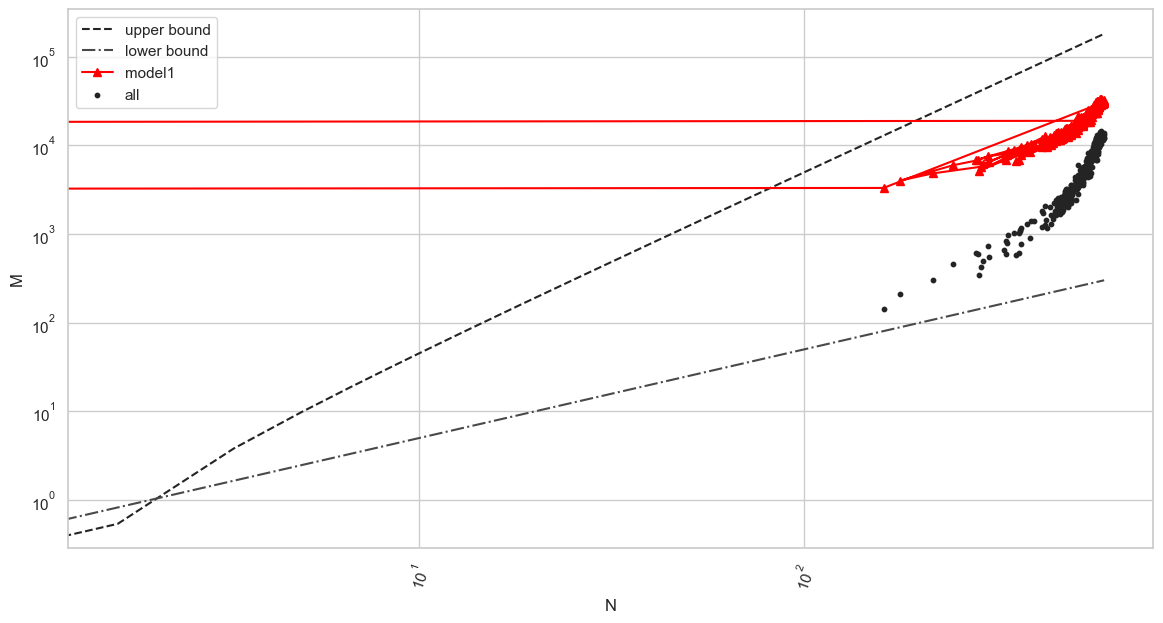

In [128]:
nn = len(all_nm[0])
xmin = min(all_nm[0])
xmax = max(all_nm[0])
p = np.linspace(xmin, xmax, nn)
upper_bound = (p**2-p)/2
lower_bound = p/2

"""
model1を用いてフィッティングする
フィッティング用の計算をする
κを求める
κは非線形最小二乗法で求める
それを使ってNpを求める
κは定数、Npは可変
"""
from scipy.optimize import curve_fit
def model1(x, kappa):
    a = (1+np.sqrt(1+(32*x/kappa)))/2
    return a*(1-2/a*kappa*(1-(1-kappa/2)**a))


# all_df[0]とall_df[1]をnp.arrayに変換
N = np.array(all_nm[0])
M = np.array(all_nm[1])

# フィッティングする
popt, pcov = curve_fit(model1,N,M)
kappa = popt[0]
print("kappa:", kappa)

# Npを求める
Np = []
for i in range(len(M)):
    Np.append((1+np.sqrt(1+32*M[i]/kappa))/2)

plt.figure(figsize=(14,7))
plt.plot(p, upper_bound, '--', label="upper bound")
plt.plot(p, lower_bound, '-.', label="lower bound")
# 縦軸にNp, 横軸にNをとる
plt.plot(N, Np, label="model1", marker="^", c="red")
plt.scatter(N, M, label="all", marker="o", s=10)
plt.xticks(rotation=70)
plt.xlabel("N")
plt.ylabel("M")
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()


/var/folders/n0/r52jwj117lx5t69xm0bw9b980000gn/T/ipykernel_89129/3737136514.py:9: RuntimeWarning: divide by zero encountered in divide
  return Np-(2/b)*(Np-(Np-b/2)**Np)
/var/folders/n0/r52jwj117lx5t69xm0bw9b980000gn/T/ipykernel_89129/3737136514.py:9: RuntimeWarning: invalid value encountered in multiply
  return Np-(2/b)*(Np-(Np-b/2)**Np)
/Users/ykaida/dev/chicago_master/venv/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


1.0


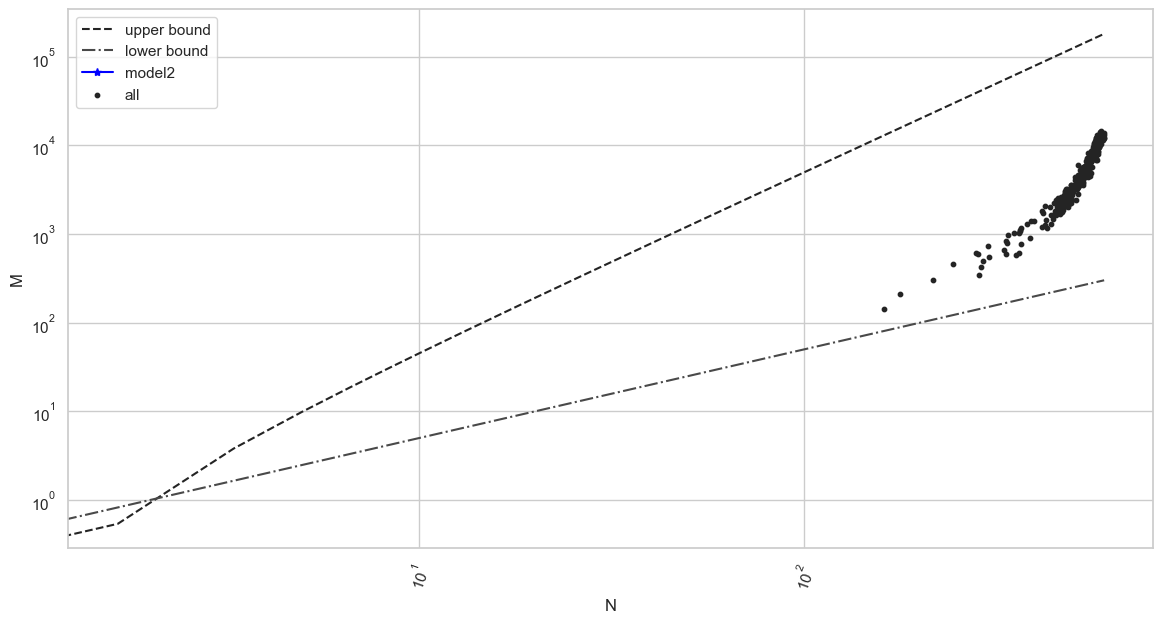

In [136]:
"""
model2を用いてフィッティング
Npは非線形最小二乗法で求める
κは可変、Npは定数
"""

def model2(x, Np):
    b = 8*x/Np*(Np-1)
    return Np-(2/b)*(Np-(Np-b/2)**Np)

popt, pcov = curve_fit(model2, N, M)

Np = popt[0]
print(Np)

kappa2 = []
for i in range(len(all_nm[1])):
    kappa2.append(8*all_nm[1][i]/Np*(Np-1))




plt.figure(figsize=(14,7))
plt.plot(p, upper_bound, '--', label="upper bound")
plt.plot(p, lower_bound, '-.', label="lower bound")
# 縦軸にNp, 横軸にNをとる
# plt.plot(all_nm[0], Np, label="model1", marker="^", c="red")
plt.plot(N, kappa2, label="model2", marker="*", c="blue")
plt.scatter(N, M, label="all", marker="o", s=10)
plt.xticks(rotation=70)
plt.xlabel("N")
plt.ylabel("M")
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()

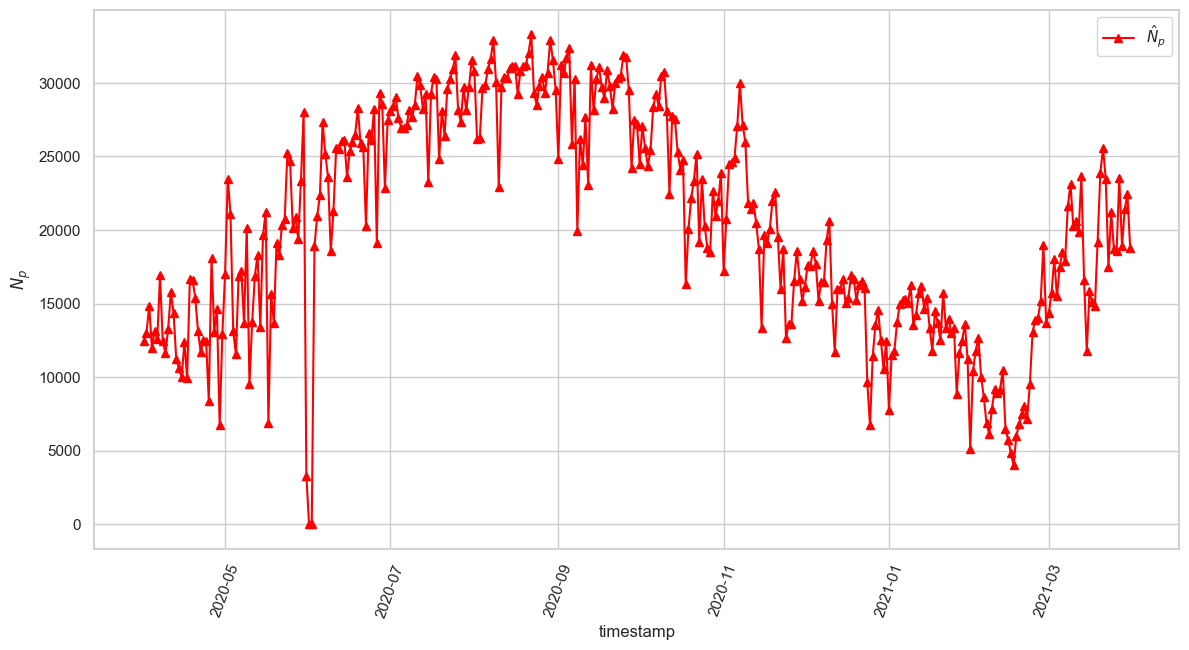

In [89]:
# Npをプロットする, model1
plt.figure(figsize=(14,7))
plt.plot(all_nm[2], Np, label=r"$\hat{N}_{p}$", marker="^", c="red")
plt.xticks(rotation=70)
plt.xlabel("timestamp")
plt.ylabel(r"$N_{p}$")
plt.legend()
plt.show()

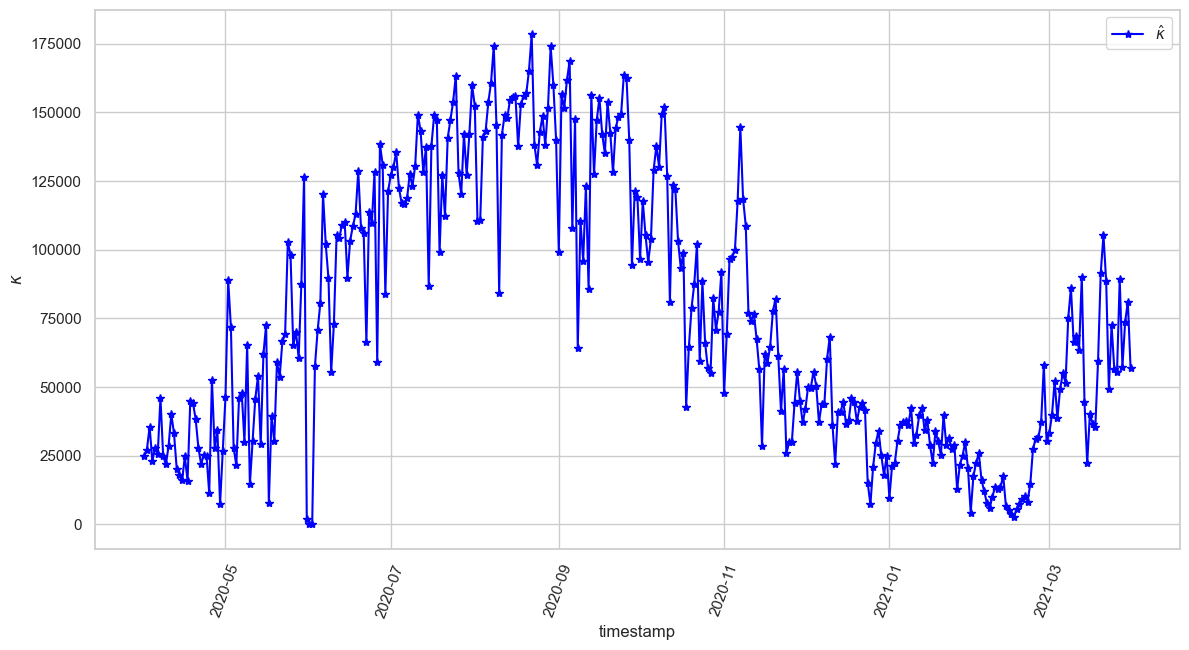

In [93]:
# kappaをプロットする, model2
plt.figure(figsize=(14,7))
plt.plot(all_nm[2], kappa2, label=r"$\hat{\kappa}$", marker="*", c="blue")
plt.xticks(rotation=70)
plt.xlabel("timestamp")
plt.ylabel(r"$\kappa$")
plt.legend()
plt.show()

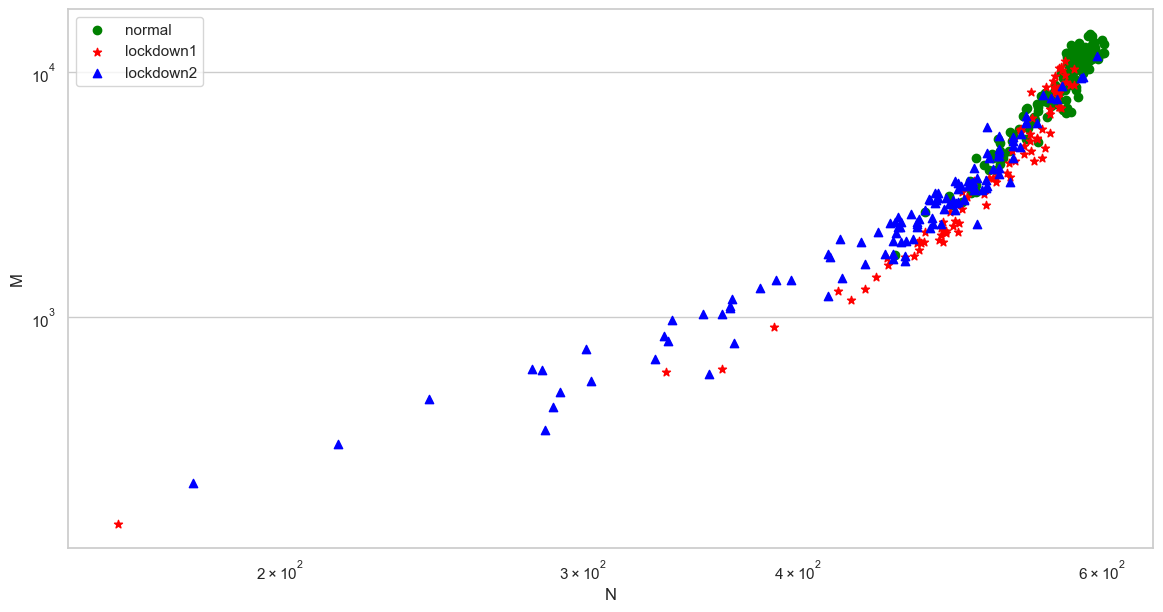

In [58]:
plt.figure(figsize=(14,7))

plt.scatter(n[0], n[1], label="normal", marker="o", c="green")
plt.scatter(l1[0], l1[1], label="lockdown1", marker="*", c="red")
plt.scatter(l2[0], l2[1], label="lockdown2", marker="^", c="blue")

plt.xticks(rotation=70)
plt.xscale('log')
plt.yscale('log')
plt.xlabel("N")
plt.ylabel("M")
plt.legend()
plt.show()


In [ ]:
# fitting
plt.figure(figsize=(14,7))

n_fit = n[0]

plt.scatter(n[0], n[1], label="normal", marker="o", c="green")
plt.scatter(l1[0], l1[1], label="lockdown1", marker="*", c="red")
plt.scatter(l2[0], l2[1], label="lockdown2", marker="^", c="blue")

plt.xticks(rotation=70)
plt.xscale('log')
plt.yscale('log')
plt.xlabel("N")
plt.ylabel("M")
plt.legend()
plt.show()